### Daniel Dorado y Sofía Álvarez

<h1 align='center'>Laboratorio 2: Experimento de Franck-Hertz</h1>

In [39]:
# ESAI
import itertools
import numpy as np
import pandas as pd
from os import listdir
from scipy.constants import e
import matplotlib.pyplot as plt
from os.path import isfile, join
from scipy.optimize import curve_fit

## Análisis Cualitativo

In [2]:
minimos = np.array([5.182, 4.923, 4.882, 5.083, 4.710])
mean_minimos = np.mean(minimos)
st_dev_minimos = np.std(minimos)
print(mean_minimos)
print(st_dev_minimos)


4.956
0.16388166462420395


## Análisis Cuantitativo

### Actividad 2 - Ejercicio 3

In [3]:
# Leemos los datos
T_165 = pd.read_csv('Datos/Min-Max/T165.txt', sep='\t')
T_170 = pd.read_csv('Datos/Min-Max/T170.txt', sep='\t')
T_175 = pd.read_csv('Datos/Min-Max/T175.txt', sep='\t')
T_180 = pd.read_csv('Datos/Min-Max/T180.txt', sep='\t')
T_185 = pd.read_csv('Datos/Min-Max/T185.txt', sep='\t')

In [21]:
# Tomamos únicamente los mínimos
T_165 = T_165[T_165['tipo'] == 'mínimo']
T_170 = T_170[T_170['tipo'] == 'mínimo']
T_175 = T_175[T_175['tipo'] == 'mínimo']
T_180 = T_180[T_180['tipo'] == 'mínimo']
T_185 = T_185[T_185['tipo'] == 'mínimo']

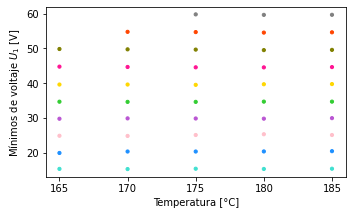

In [22]:
plt.figure(figsize=(5,5/1.61616))
colors = ['turquoise','dodgerblue','pink','mediumorchid','limegreen','gold', 'deeppink', 'olive', 'orangered', 'gray']
plt.scatter([165]*len(T_165), T_165['U1[V]'], s=10, c = colors[:-2])
plt.scatter([170]*len(T_170), T_170['U1[V]'], s=10, c= colors[:-1])
plt.scatter([175]*len(T_175), T_175['U1[V]'], s=10, c=colors)
plt.scatter([180]*len(T_180), T_180['U1[V]'], s=10, c=colors)
plt.scatter([185]*len(T_185), T_185['U1[V]'], s=10, c=colors)
plt.xlabel(r'Temperatura [°C]')
plt.xticks([165, 170, 175, 180, 185])
plt.ylabel(r'Mínimos de voltaje $U_1$ [V]')
plt.tight_layout()
plt.savefig('minimos.pdf')
plt.show()

In [23]:
def minimos(lista, nombre_columna='U1[V]'):
    lista_minimos = []
    for i in range(len(lista)-1,0,-1):
        lista_minimos.append(list(lista[nombre_columna])[i] - list(lista[nombre_columna])[i-1])
    return lista_minimos

def orden_minimos(lista): return [i+3 for i in range(len(lista))]

In [27]:
minimos_165 = np.array(minimos(T_165))  
minimos_170 = np.array(minimos(T_170))
minimos_175 = np.array(minimos(T_175))
minimos_180 = np.array(minimos(T_180))
minimos_185 = np.array(minimos(T_185))

In [8]:
media_165 = np.mean(minimos_165)
st_dev_165 = np.std(minimos_165)
print(media_165, st_dev_165)

4.937142857142858 0.1659358125226464


In [9]:
media_170 = np.mean(minimos_170)
st_dev_170 = np.std(minimos_170)
print(media_170, st_dev_170)

4.945 0.1978635893740928


In [10]:
media_175 = np.mean(minimos_175)
st_dev_175 = np.std(minimos_175)
print(media_175, st_dev_175)

4.943333333333333 0.1363003220017392


In [11]:
media_180 = np.mean(minimos_180)
st_dev_180 = np.std(minimos_180)
print(media_180, st_dev_180)

4.935555555555556 0.17308386606312479


In [12]:
media_185 = np.mean(minimos_185)
st_dev_185 = np.std(minimos_185)
print(media_185, st_dev_185)

4.930000000000001 0.1388844443733302


In [13]:
temperaturas = [165, 170, 175, 180, 185]
voltajes = [np.round(media_165), np.round(media_170), np.round(media_175), np.round(media_180), np.round(media_185)]
desv = [np.round(st_dev_165), np.round(st_dev_170), np.round(st_dev_175), np.round(st_dev_180), np.round(st_dev_185)]
#plt.errorbar(temperaturas, voltajes, '.', yerr=desv)

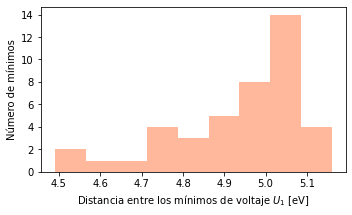

In [60]:
todos_los_minimos = list(itertools.chain(minimos_165, minimos_170, minimos_175, minimos_180, minimos_185))
plt.figure(figsize=(5,5/1.61616))
n, bins, patches = plt.hist(todos_los_minimos, 9, facecolor='lightsalmon', alpha=0.75)
plt.xlabel(r'Distancia entre los mínimos de voltaje $U_1$ [eV]')
plt.ylabel(r'Número de mínimos')
plt.tight_layout()
plt.savefig('histograma_minimos.pdf')

In [59]:
todos_los_minimos = np.array(todos_los_minimos)
todos_los_minimos_media = np.mean(todos_los_minimos)
todos_los_minimos_stdev = np.std(todos_los_minimos)
print(todos_los_minimos_media, todos_los_minimos_stdev)

4.938095238095238 0.16312773398895622


--- 
Viendo los archivos, podemos encontrar una mayor cantidad de mínimos (en posiciones más adecuadas).

### Actividad 2 - Ejercicio 5
Para valores cambiantes de $U_2$

In [ ]:
_1_0_V = pd.read_csv('Datos/U2-Variable/1-0V.txt', sep='\t')
_1_3_V = pd.read_csv('Datos/U2-Variable/1-3V.txt', sep='\t')
_1_5_V = pd.read_csv('Datos/U2-Variable/1-5V.txt', sep='\t')
_1_8_V = pd.read_csv('Datos/U2-Variable/1-8V.txt', sep='\t')
_2_0_V = pd.read_csv('Datos/U2-Variable/2-0V.txt', sep='\t')

In [ ]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(_1_0_V['U1'], _1_0_V['I'], label= r'$U_2$=1.0V', color='turquoise')
plt.plot(_1_3_V['U1'], _1_3_V['I'], label= r'$U_2$=1.3V', color='dodgerblue')
plt.plot(_1_5_V['U1'], _1_5_V['I'], label= r'$U_2$=1.5V', color='pink')
plt.plot(_1_8_V['U1'], _1_8_V['I'], label= r'$U_2$=1.8V', color='mediumorchid')
plt.plot(_2_0_V['U1'], _2_0_V['I'], label= r'$U_2$=2.0V', color='limegreen')
plt.legend()
plt.xlabel(r'Voltaje $U_1$ [V]')
plt.ylabel(r'Corriente $I_A$ [nA]')
plt.tight_layout()
plt.savefig('U2.pdf')


### Actividad 2 - Ejercicio 5
Para valores cambiantes de $U_H$

In [ ]:
_5_8_V = pd.read_csv('Datos/UH-Variable/5-8V.txt', sep='\t')
_6_0_V = pd.read_csv('Datos/UH-Variable/6-0V.txt', sep='\t')
_6_2_V = pd.read_csv('Datos/UH-Variable/6-2V.txt', sep='\t')
_6_4_V = pd.read_csv('Datos/UH-Variable/6-4V.txt', sep='\t')
_6_6_V = pd.read_csv('Datos/UH-Variable/6-6V.txt', sep='\t')
_6_8_V = pd.read_csv('Datos/UH-Variable/6-8V.txt', sep='\t')

In [ ]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(_5_8_V['U1'], _5_8_V['I'], label= r'$U_H$=5.8V', color='turquoise')
plt.plot(_6_0_V['U1'], _6_0_V['I'], label= r'$U_H$=6.0V', color='dodgerblue')
plt.plot(_6_2_V['U1'], _6_2_V['I'], label= r'$U_H$=6.2V', color='pink')
plt.plot(_6_4_V['U1'], _6_4_V['I'], label= r'$U_H$=6.4V', color='mediumorchid')
plt.plot(_6_6_V['U1'], _6_6_V['I'], label= r'$U_H$=6.6V', color='limegreen')
plt.plot(_6_8_V['U1'], _6_8_V['I'], label= r'$U_H$=6.8V', color='gold')
plt.legend()
plt.xlabel(r'Voltaje $U_1$ [V]')
plt.ylabel(r'Corriente $I_A$ [nA]')
plt.tight_layout()
plt.savefig('UH.pdf')


### Actividad 3

In [ ]:
orden_165 = orden_minimos(minimos_165)
orden_170 = orden_minimos(minimos_170)
orden_175 = orden_minimos(minimos_175)
orden_180 = orden_minimos(minimos_180)
orden_185 = orden_minimos(minimos_185)

In [ ]:
def linear(x,m,b):
    return m*x + b

In [ ]:
x_165 = np.linspace(0,9,7)
x_170 = np.linspace(0,10,8)
x_175 = np.linspace(0,11,9)
popt_165, pcov_165 = curve_fit(linear, x_165, minimos_165[::-1])
popt_170, pcov_170 = curve_fit(linear, x_170, minimos_170[::-1])
popt_175, pcov_175 = curve_fit(linear, x_175, minimos_175[::-1])
popt_180, pcov_180 = curve_fit(linear, x_175, minimos_180[::-1])
popt_185, pcov_185 = curve_fit(linear, x_175, minimos_185[::-1])

In [ ]:
plt.figure(figsize=(5,5/1.61616))
plt.axvline(x=0.5, ls='--', c='orangered')
plt.text(x=0.7, y=5.1, s=r'n=0.5', c='orangered')
plt.plot(orden_165, minimos_165[::-1], '.', color='turquoise', label='T = 165°C')
plt.plot(x_165, popt_165[0]*x_165 + popt_165[1], color='turquoise')

plt.plot(orden_170, minimos_170[::-1], '.', color='dodgerblue', label='T = 170°C')
plt.plot(x_170, popt_170[0]*x_170 + popt_170[1], color='dodgerblue')

plt.plot(orden_175, minimos_175[::-1], '.', color='pink', label='T = 175°C')
plt.plot(x_175, popt_175[0]*x_175 + popt_175[1], color='pink')

plt.plot(orden_180, minimos_180[::-1], '.', color='mediumorchid', label='T = 180°C')
plt.plot(x_175, popt_180[0]*x_175 + popt_180[1], color='mediumorchid')

plt.plot(orden_185, minimos_185[::-1], '.', color='limegreen', label='T = 185°C')
plt.plot(x_175, popt_185[0]*x_175 + popt_185[1], color='limegreen')

plt.xlabel('Orden del mínimo (n)')
plt.ylabel(r'Diferencia de voltaje $\Delta U_1$ [eV]')
plt.legend()
plt.tight_layout()
plt.savefig('mean_free_path.pdf')

In [ ]:
L = 12*10**-3
E_a_teorico = 4.67
def l(m): return L*m/(2*E_a_teorico)
def E_A(m,b): return m*0.5 + b

In [ ]:
E_A_165 = E_A(popt_165[0], popt_165[1])
E_A_170 = E_A(popt_170[0], popt_170[1])
E_A_175 = E_A(popt_175[0], popt_175[1])
E_A_180 = E_A(popt_180[0], popt_180[1])
E_A_185 = E_A(popt_185[0], popt_185[1])
media_E_A = np.mean([E_A_165, E_A_170, E_A_175, E_A_180, E_A_185])
std_E_A = np.std([E_A_165, E_A_170, E_A_175, E_A_180, E_A_185])
print(media_E_A, std_E_A)

In [ ]:
l_165 = l(popt_165[0])
l_170 = l(popt_170[0])
l_175 = l(popt_175[0])
l_180 = l(popt_180[0])
l_185 = l(popt_185[0])

In [ ]:
k = 1.38064852e-23

In [ ]:
def pressure (temp):
    r = 9-3110/temp
    t = 10**r
    return 8.7*t

def density (temp):
    return pressure(temp)/(k*temp)

R = 155e-12
sigma = np.pi*(R**2) 

def mean_free_path (temp):
    c = np.sqrt(2)*sigma
    c *= density(temp)
    return 1/c

In [ ]:
x = np.linspace(150,200,1000)

plt.figure(figsize=(5,5/1.61616))
#plt.subplot(1,2,1)
#plt.title(r'Coeficientes de reflexión y transmisión para luz incidente sobre el diamante desde el aire')
plt.plot(x,mean_free_path(x+273.15)*10**3,color='pink', label=r'Camino libre teórico')
plt.plot(165,l_165*10**3, '.', c='dodgerblue', label=r'Camino libre experimental')
plt.plot(170,l_170*10**3, '.', c='dodgerblue')
plt.plot(175,l_175*10**3, '.', c='dodgerblue')
plt.plot(180,l_180*10**3, '.', c='dodgerblue')
plt.plot(185,l_185*10**3, '.', c='dodgerblue')
plt.errorbar(165, l_165*10**3, yerr=np.sqrt(pcov_165[0][0]), c='dodgerblue')
plt.errorbar(170, l_170*10**3, yerr=np.sqrt(pcov_170[0][0]), c='dodgerblue')
plt.errorbar(175, l_175*10**3, yerr=np.sqrt(pcov_175[0][0]), c='dodgerblue')
plt.errorbar(180, l_180*10**3, yerr=np.sqrt(pcov_180[0][0]), c='dodgerblue')
plt.errorbar(185, l_185*10**3, yerr=np.sqrt(pcov_185[0][0]), c='dodgerblue')
plt.xlabel('Temperatura [C]')
plt.ylabel('Camino libre medio [mm]')
plt.tight_layout()
plt.legend()
plt.savefig('mfp_teo_exp.pdf')